In [1]:
import pandas as pd
import joblib

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Load Data

In [2]:
matches = pd.read_csv("vct_data/test_preprocessed.csv")

features = [
    "Team A_Encoded", 
    "Team B_Encoded",

    "Team A H2H Win %",
    "Team B H2H Win %",

    # "Team A Tournament Win %",
    # "Team B Tournament Win %",

    "Recent Win %_TeamA",
    "Recent Win %_TeamB",

    "Map_Abyss",
    "Map_Ascent",
    "Map_Bind",
    "Map_Breeze",
    "Map_Fracture",
    "Map_Haven",
    "Map_Icebox",
    "Map_Lotus",
    "Map_Pearl",
    "Map_Split",
    "Map_Sunset",

    "Team A Map Win %",
    "Team B Map Win %",

    # "Round Win %_RollAvg_TeamA",
    # "Round Win %_RollAvg_TeamB",

    "Attacker Win %_RollAvg_TeamA",
    "Attacker Win %_RollAvg_TeamB",

    "Defender Win %_RollAvg_TeamA",
    "Defender Win %_RollAvg_TeamB",

    "Overtime Win %_RollAvg_TeamA",
    "Overtime Win %_RollAvg_TeamB",

    "Rating_RollAvg_TeamA",
    "Rating_RollAvg_TeamB",

    "Average Combat Score_RollAvg_TeamA",
    "Average Combat Score_RollAvg_TeamB", 

    "Average Damage Per Round_RollAvg_TeamA",
    "Average Damage Per Round_RollAvg_TeamB",

    "KDA_RollAvg_TeamA",
    "KDA_RollAvg_TeamB",

    "Kill, Assist, Trade, Survive %_RollAvg_TeamA", 
    "Kill, Assist, Trade, Survive %_RollAvg_TeamB",

    "First Blood %_RollAvg_TeamA",
    "First Blood %_RollAvg_TeamB",

    "Headshot %_RollAvg_TeamA",
    "Headshot %_RollAvg_TeamB",

    "Clutches_RollAvg_TeamA",
    "Clutches_RollAvg_TeamB",

    "Econ_RollAvg_TeamA",
    "Econ_RollAvg_TeamB",
]

X_test = matches[features]
y_test = matches["Winner"]

X_test.head()

,Team A_Encoded,Team B_Encoded,Team A H2H Win %,Team B H2H Win %,Recent Win %_TeamA,Recent Win %_TeamB,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset,Team A Map Win %,Team B Map Win %,Attacker Win %_RollAvg_TeamA,Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamB,Rating_RollAvg_TeamA,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamA,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamA,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamA","Kill, Assist, Trade, Survive %_RollAvg_TeamB",First Blood %_RollAvg_TeamA,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamA,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamA,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamA,Econ_RollAvg_TeamB
0,0.447334,0.414839,0.5,0.5,0.4,0.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.200000,0.666667,0.450000,0.562500,0.463308,0.436111,0.000,0.025,0.9240,0.9710,194.40,197.86,125.38,129.62,1.301095,1.379461,0.7012,0.7036,0.513037,0.475159,0.2098,0.2452,1.6,1.8,50.04,52.34
1,0.572950,0.371567,1.0,0.0,0.3,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.500000,0.545014,0.436111,0.516667,0.025,0.000,0.9364,1.0512,194.06,211.96,127.78,136.70,1.312059,1.607471,0.6876,0.7350,0.460159,0.550017,0.2482,0.2510,1.8,1.4,51.30,57.50
2,0.628433,0.414839,0.0,1.0,0.6,0.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.545014,0.500000,0.516667,0.436111,0.000,0.025,1.0512,0.9364,211.96,194.06,136.70,127.78,1.607471,1.312059,0.7350,0.6876,0.550017,0.460159,0.2510,0.2482,1.4,1.8,57.50,51.30
3,0.572950,0.371567,0.5,0.5,0.3,0.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.600000,0.700000,0.491667,0.520014,0.477778,0.475000,0.025,0.000,0.9648,1.0178,198.04,207.98,130.76,134.68,1.367839,1.434472,0.6984,0.7212,0.472659,0.531267,0.2430,0.2582,1.9,1.4,52.70,54.70
4,0.628433,0.414839,0.5,0.5,0.6,0.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.700000,0.600000,0.520014,0.491667,0.475000,0.477778,0.000,0.025,1.0178,0.9648,207.98,198.04,134.68,130.76,1.434472,1.367839,0.7212,0.6984,0.531267,0.472659,0.2582,0.2430,1.4,1.9,54.70,52.70


# Load Pretrained Model

In [3]:
model = joblib.load("models/stacked_base_rf_xgb_meta_lr_v2.pkl")
print(model)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=41,
                                                       min_samples_leaf=29,
                                                       min_samples_split=23,
                                                       n_estimators=439,
                                                       n_jobs=-1,
                                                       random_state=1)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.4809894955932661,
                                              device=None,
                                              early_stopping_rounds=N

# Setting Up Betting Environment

In [4]:
# 1. Get predicted probabilities for both teams
predicted_probs = model.predict_proba(X_test)

# Extract probabilities of each team winning
predicted_prob_TeamA = predicted_probs[:, 1]  # class '1' is for Team A won
predicted_prob_TeamB = 1 - predicted_prob_TeamA  # Team B's probability is complementary to Team A's

In [5]:
# 2. Generate synthetic odds based on predicted probabilities
#    Formula: Odds = 1 / Predicted Probability
odds_TeamA = 1 / predicted_prob_TeamA
odds_TeamB = 1 / predicted_prob_TeamB

# 3. Adjust odds to simulate bookmaker's margin
#    Let's assume we want to apply a 5% margin (vig)
vig_percentage = 0.05
odds_TeamA_adjusted = 1 / ((1 + vig_percentage) * predicted_prob_TeamA)
odds_TeamB_adjusted = 1 / ((1 + vig_percentage) * predicted_prob_TeamB)

# 4. Add the synthetic odds to the test dataset
matches["predicted_prob_TeamA"] = predicted_prob_TeamA
matches["predicted_prob_TeamB"] = predicted_prob_TeamB
matches["odds_TeamA"] = odds_TeamA_adjusted
matches["odds_TeamB"] = odds_TeamB_adjusted

matches.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,KDA_TeamA,Round Win %_TeamA,First Blood %_TeamA,Clutches_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Round Win %_RollAvg_TeamA,Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Round Win %_TeamB,First Blood %_TeamB,Clutches_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Round Win %_RollAvg_TeamB,Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Tournament Win %,Team A Map Win %,Team A H2H Win %,Team B Tournament Win %,Team B Map Win %,Team B H2H Win %,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset,Team A_Encoded,Team B_Encoded,Winner,predicted_prob_TeamA,predicted_prob_TeamB,odds_TeamA,odds_TeamB
0,Champions Tour Malaysia & Singapore Stage 2: C...,Group Stage,Day 7,BLEED vs Galaxy Esports,Icebox,Galaxy Esports,13,4,9.0,0.0,BLEED,7,3,4.0,0.0,43.333333,1.164,222.2,82.0,60.0,18.0,22.0,0.730,145.6,0.226,11.0,9.0,2.0,0.806,179.2,60.0,82.0,24.0,-22.0,0.630,119.2,0.240,9.0,11.0,-2.0,19605.000000,10715.000000,Full buy: 20k+,15860.000000,4590.000000,Semi-buy: 10-20k,14.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,67.2,5.0,2.0,10.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,46.2,5.0,0.0,10.0,1.0,2.0,0.0,4.0,2.0,0.0,1.0,4.0,2.0,0.0,1.0,10.0,1.0,2.0,0.0,1.666667,0.650000,0.550000,1.0,0.500000,0.750000,0.0,0.9240,194.40,125.38,1.301095,0.7012,0.440863,0.450000,0.463308,0.000,0.513037,0.2098,1.6,50.04,0.4,1.024390,0.350000,0.450000,3.0,0.250000,0.500000,0.0,0.9710,197.86,129.62,1.379461,0.7036,0.489425,0.562500,0.436111,0.025,0.475159,0.2452,1.8,52.34,0.6,0.500000,0.200000,0.5,0.571429,0.666667,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.447334,0.414839,1,0.352162,0.647838,2.704384,1.470091
1,Champions Tour Malaysia & Singapore Stage 2: C...,Group Stage,Day 8,BLEED vs KPMOONIIBLM9,Ascent,BLEED,11,5,6.0,0.0,KPMOONIIBLM9,13,6,7.0,0.0,46.366667,0.920,196.2,80.0,86.0,35.0,-6.0,0.

# Verifying Odds and Probabilities

In [6]:
# Probabilities should always be between 0 and 1
# Odds should always be greater than 1
# Odds should be inversely proportional to the predicted probabilities
print(matches[['predicted_prob_TeamA', 'odds_TeamA', 'predicted_prob_TeamB', 'odds_TeamB']].head(10))


   predicted_prob_TeamA  odds_TeamA  predicted_prob_TeamB  odds_TeamB
0              0.352162    2.704384              0.647838    1.470091
1              0.340585    2.796311              0.659415    1.444281
2              0.628082    1.516332              0.371918    2.560728
3              0.405718    2.347398              0.594282    1.602573
4              0.597047    1.595151              0.402953    2.363506
5              0.888719    1.071634              0.111281    8.558320
6              0.110736    8.600428              0.889264    1.070977
7              0.874103    1.089552              0.125897    7.564768
8              0.121543    7.835749              0.878457    1.084152
9              0.841303    1.132031              0.158697    6.001252


In [7]:
# Check if the sum of probabilities for each match is equal or close to 1
prob_check = matches['predicted_prob_TeamA'] + matches['predicted_prob_TeamB']
prob_check.describe()


count    10121.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64

# Applying Betting Strategies on the Simulation

In [ ]:
def kelly_criterion(prob, odds):
    return (prob * (odds - 1) - (1 - prob)) / (odds - 1)

def implied_probability(odds):
    return 1 / odds

def simulate_betting_strategy(matches, strategy, bankroll=1000, threshold=0.7, min_prob_to_bet=0.6):
    """
    Parameters:
        matches (pd.DataFrame): The matches dataset with predictions and odds
        strategy (str): The betting strategy to use ('flat', 'kelly', 'threshold', 'value', 'martingale')
        bankroll (float): Initial bankroll for the simulation
        threshold (float): Probability threshold for betting strategies that use confidence levels
        min_prob_to_bet (float): Minimum model probability for placing a bet

    Returns:
        results (dict): A dictionary containing the strategy performance results
    """

    total_bet = 0
    total_won = 0
    current_bankroll = bankroll
    martingale_base_bet = 5  # Base bet for Martingale strategy
    martingale_bet = martingale_base_bet  # Current bet, increases after loss

    for index, row in matches.iterrows():
        bet_amount = 5  # Default bet amount for other strategies
        bet_team = None
        odds = None

        # Check if the probability is too low to bet
        if max(row["predicted_prob_TeamA"], row["predicted_prob_TeamB"]) < min_prob_to_bet:
            continue  # Skip this match if the probability is too low

        if strategy == "flat":
            # Bet the fixed amount (default bet amount)
            if row["predicted_prob_TeamA"] > row["predicted_prob_TeamB"]:
                bet_team = "Team A"
                odds = row["odds_TeamA"]
            else:
                bet_team = "Team B"
                odds = row["odds_TeamB"]

        elif strategy == "kelly":
            # Use Kelly Criterion for bet size
            if row["predicted_prob_TeamA"] > row["predicted_prob_TeamB"]:
                bet_team = "Team A"
                odds = row["odds_TeamA"]
                prob = row["predicted_prob_TeamA"]
            else:
                bet_team = "Team B"
                odds = row["odds_TeamB"]
                prob = row["predicted_prob_TeamB"]

            # Calculate Kelly fraction
            kelly_fraction = kelly_criterion(prob, odds)
            if kelly_fraction > 0:  # Only bet if Kelly suggests positive value
                bet_amount = current_bankroll * kelly_fraction

        elif strategy == "threshold":
            # Bet only if predicted probability exceeds the threshold
            if row["predicted_prob_TeamA"] > row["predicted_prob_TeamB"]:
                bet_team = "Team A"
                prob = row["predicted_prob_TeamA"]
                odds = row["odds_TeamA"]
            else:
                bet_team = "Team B"
                prob = row["predicted_prob_TeamB"]
                odds = row["odds_TeamB"]

            # Only place a bet if probability exceeds threshold
            if prob > threshold:
                bet_amount = 10

        elif strategy == "value":
            # Bet if predicted probability exceeds bookmaker's implied probability
            if row["predicted_prob_TeamA"] > row["predicted_prob_TeamB"]:
                bet_team = "Team A"
                prob = row["predicted_prob_TeamA"]
                odds = row["odds_TeamA"]
            else:
                bet_team = "Team B"
                prob = row["predicted_prob_TeamB"]
                odds = row["odds_TeamB"]

            implied_prob = implied_probability(odds)
            if prob > implied_prob:
                bet_amount = 10

        elif strategy == "martingale":
            # Martingale strategy increases the bet after a loss
            if row["predicted_prob_TeamA"] > row["predicted_prob_TeamB"]:
                bet_team = "Team A"
                odds = row["odds_TeamA"]
            else:
                bet_team = "Team B"
                odds = row["odds_TeamB"]

            bet_amount = martingale_bet  # Use the current Martingale bet

        # Place the bet if a bet_team has been selected and a bet amount is positive
        if bet_team and bet_amount > 0:
            total_bet += bet_amount

            # Check if the bet was won
            if (bet_team == "Team A" and row["Winner"] == 1) or (bet_team == "Team B" and row["Winner"] == 0):
                total_won += bet_amount * odds
                current_bankroll += bet_amount * odds - bet_amount

                # Reset Martingale bet after a win
                if strategy == "martingale":
                    martingale_bet = martingale_base_bet
            else:
                current_bankroll -= bet_amount

                # Double the bet for Martingale after a loss
                if strategy == "martingale":
                    martingale_bet *= 2

    return {
        "strategy": strategy,
        "total_bet": total_bet,
        "total_won": total_won,
        "profit": total_won - total_bet,
        "final_bankroll": current_bankroll
    }

# Simulate betting strategies
results = []
strategies = ["flat", "kelly", "threshold", "value", "martingale"]
for strategy in strategies:
    result = simulate_betting_strategy(matches, strategy)
    results.append(result)

# Convert to DataFrame for analysis
df_results = pd.DataFrame(results)
print(df_results)


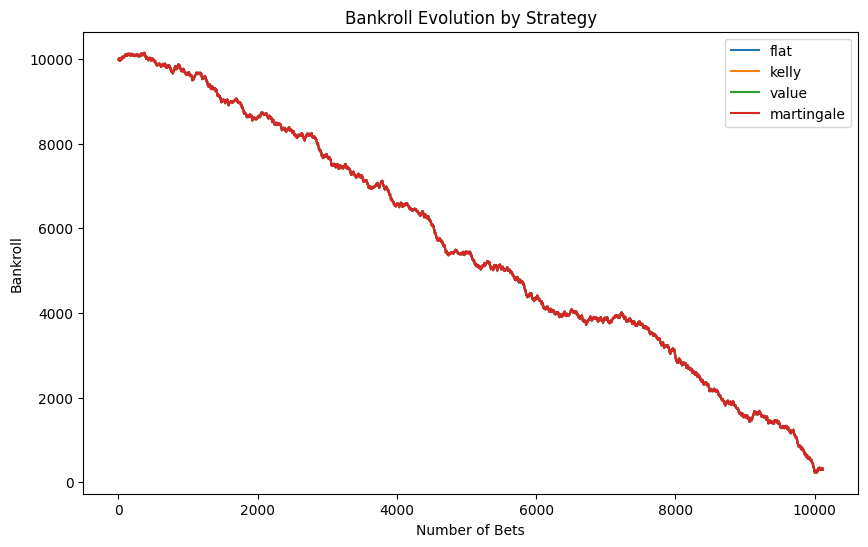

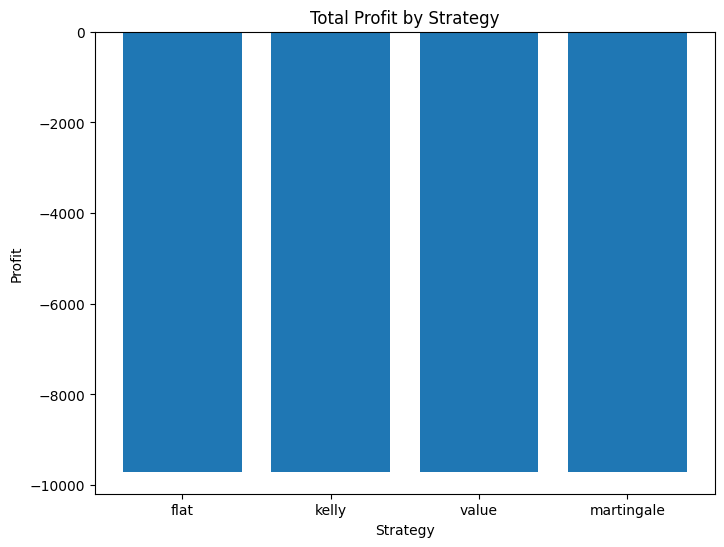

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

def simulate_betting_strategy(matches, strategy, bankroll=10000, threshold=0.8):
    total_bet = 0
    total_won = 0
    current_bankroll = bankroll
    bankroll_over_time = []  # To store the evolution of bankroll over time

    for index, row in matches.iterrows():
        bet_amount = 10
        bet_team = None
        odds = None

        if strategy == "flat":
            if row["predicted_prob_TeamA"] > row["predicted_prob_TeamB"]:
                bet_team = "Team A"
                odds = row["odds_TeamA"]
            else:
                bet_team = "Team B"
                odds = row["odds_TeamB"]

        elif strategy == "kelly":
            if row["predicted_prob_TeamA"] > row["predicted_prob_TeamB"]:
                bet_team = "Team A"
                odds = row["odds_TeamA"]
                prob = row["predicted_prob_TeamA"]
            else:
                bet_team = "Team B"
                odds = row["odds_TeamB"]
                prob = row["predicted_prob_TeamB"]

            kelly_fraction = (prob * (odds - 1) - (1 - prob)) / (odds - 1)
            if kelly_fraction > 0:
                bet_amount = current_bankroll * kelly_fraction

        elif strategy == "value":
            if row["predicted_prob_TeamA"] > row["predicted_prob_TeamB"]:
                bet_team = "Team A"
                prob = row["predicted_prob_TeamA"]
                odds = row["odds_TeamA"]
            else:
                bet_team = "Team B"
                prob = row["predicted_prob_TeamB"]
                odds = row["odds_TeamB"]

            implied_prob = 1 / odds
            if prob > implied_prob:
                bet_amount = 10

        elif strategy == "martingale":
            if row["predicted_prob_TeamA"] > row["predicted_prob_TeamB"]:
                bet_team = "Team A"
                odds = row["odds_TeamA"]
            else:
                bet_team = "Team B"
                odds = row["odds_TeamB"]

        if bet_team and bet_amount > 0:
            total_bet += bet_amount
        
            if (bet_team == "Team A" and row["Winner"] == 1) or (bet_team == "Team B" and row["Winner"] == 0):
                total_won += bet_amount * odds
                current_bankroll += bet_amount * odds - bet_amount
            else:
                current_bankroll -= bet_amount

            # Track bankroll evolution
            bankroll_over_time.append(current_bankroll)

    return {
        "strategy": strategy,
        "total_bet": total_bet,
        "total_won": total_won,
        "profit": total_won - total_bet,
        "final_bankroll": current_bankroll,
        "bankroll_over_time": bankroll_over_time
    }

# Simulate betting strategies
strategies = ["flat", "kelly", "value", "martingale"]
results = []
bankrolls_over_time = {}

for strategy in strategies:
    result = simulate_betting_strategy(matches, strategy)
    results.append(result)
    bankrolls_over_time[strategy] = result["bankroll_over_time"]

# Convert results to DataFrame for analysis
df_results = pd.DataFrame(results)

# Plot the evolution of the bankroll for each strategy
plt.figure(figsize=(10, 6))
for strategy, bankroll in bankrolls_over_time.items():
    plt.plot(bankroll, label=strategy)
plt.xlabel('Number of Bets')
plt.ylabel('Bankroll')
plt.title('Bankroll Evolution by Strategy')
plt.legend()
plt.show()

# Plot the profits for each strategy
plt.figure(figsize=(8, 6))
plt.bar(df_results['strategy'], df_results['profit'])
plt.xlabel('Strategy')
plt.ylabel('Profit')
plt.title('Total Profit by Strategy')
plt.show()
